#### Restaurant Food Cost

#### Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

#### You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

#### Dataset Attributes

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

#### Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx

•   https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_excel('Data_Train.xlsx')

In [61]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [62]:
df_test=pd.read_excel('Data_Test.xlsx')

In [63]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


# Statistical Summary

In [64]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [65]:
df_test.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


#### Here the numerical data is less as we can see in test data only restaurant id is numerical there. Lets change some columns data type which makes our data more relevant. 

In [67]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').str.replace(' vote', '').str.strip()
df['VOTES'] = df['VOTES'].fillna('0')
df['VOTES'] = df['VOTES'].astype(int)

In [68]:
df_test['VOTES'] = df_test['VOTES'].str.replace(' votes', '').str.replace(' vote', '').str.strip()
df_test['VOTES'] = df_test['VOTES'].fillna('0')
df_test['VOTES'] = df_test['VOTES'].astype(int)

##### We removed the string  'votes' from Votes column so we can make that column as int datatype.

In [69]:
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')
df['RATING'] = df['RATING'].fillna(0)
df_test['RATING'] = pd.to_numeric(df_test['RATING'], errors='coerce')
df_test['RATING'] = df_test['RATING'].fillna(0)

##### Now we are having some data to work on !! for algorithms and for maniplutaion !!

### Now lets make our data more reliable by turning NaN as we turned that into 0 to more relevant data point

In [70]:
mean_rating = df_test.loc[df_test['RATING'] != 0, 'RATING'].mean()
df_test['RATING'] = df_test['RATING'].replace(0, mean_rating)
mean_rating = df.loc[df['RATING'] != 0, 'RATING'].mean()
df['RATING'] = df['RATING'].replace(0, mean_rating)

In [71]:
mean_votes = df_test.loc[df_test['VOTES'] != 0, 'VOTES'].mean()
df_test['VOTES'] = df_test['VOTES'].replace(0, mean_votes)
mean_votes = df.loc[df['VOTES'] != 0, 'VOTES'].mean()
df['VOTES'] = df['VOTES'].replace(0, mean_votes)

In [72]:
df.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.785452,415.668901,655.252246
std,4504.874150,0.401565,801.745630,627.003540
min,0.000000,2.000000,4.000000,20.000000
25%,3863.250000,3.600000,64.000000,300.000000
50%,7740.000000,3.800000,200.000000,500.000000
75%,11688.750000,4.000000,415.668901,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


In [73]:
df_test.describe()

,RESTAURANT_ID,RATING,VOTES
count,4231.000000,4231.000000,4231.000000
mean,7791.438431,3.781536,429.769391
std,4458.797621,0.412295,790.961355
min,3.000000,2.100000,3.000000
25%,3908.500000,3.600000,66.000000
50%,7798.000000,3.800000,214.000000
75%,11634.000000,4.000000,429.769391
max,15572.000000,4.900000,15205.000000


#### For numerical columns we dont have any Null value, Now the data is more reliable for further process.

# EDA (Exploratory Data Analysis)

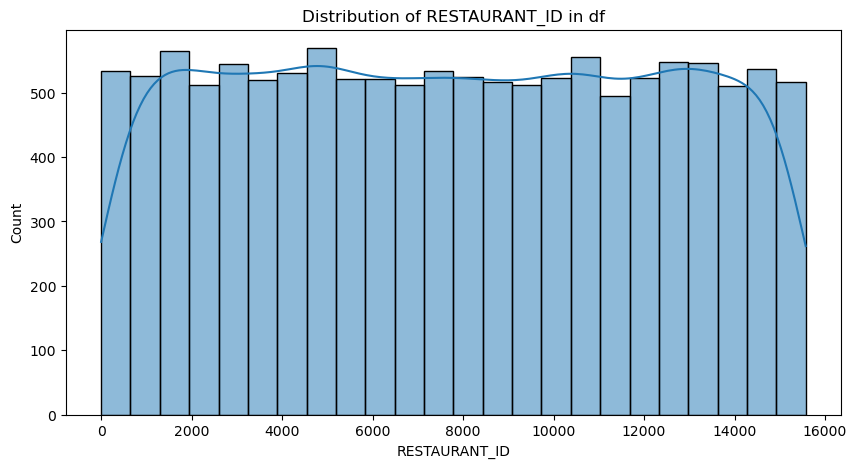

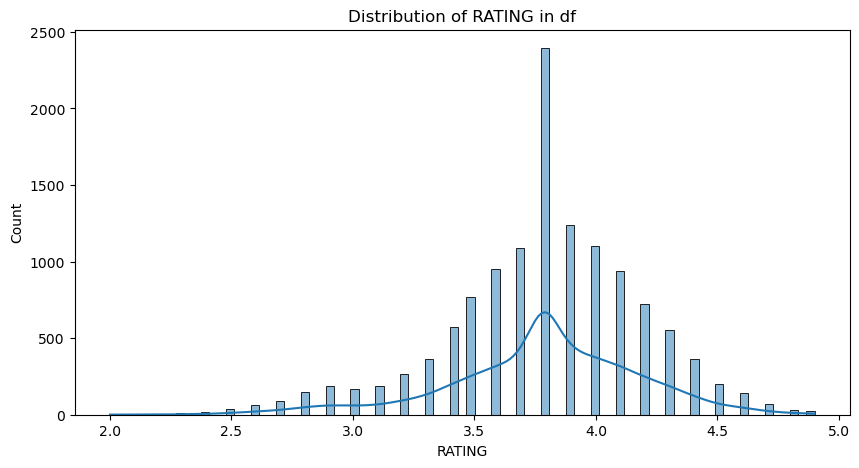

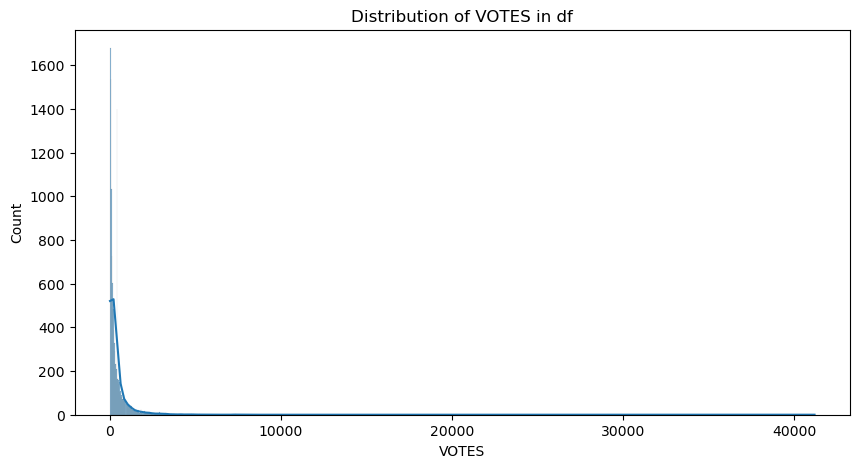

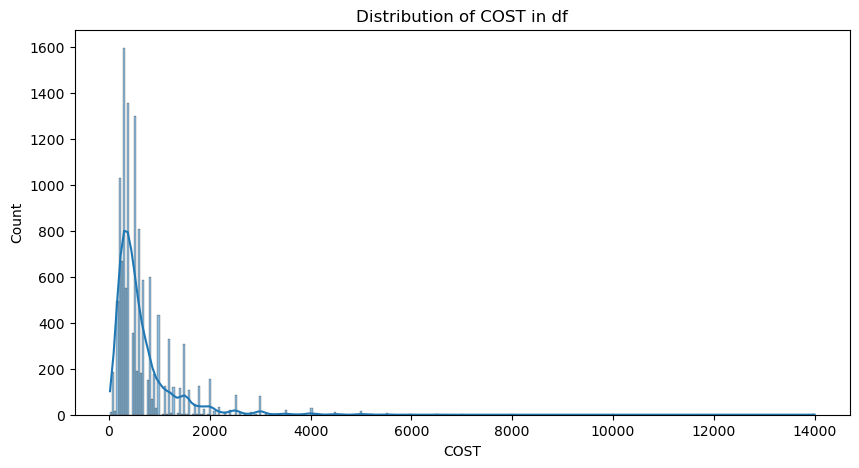

In [74]:
numerical_cols_df = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols_df:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} in df')
    plt.show()

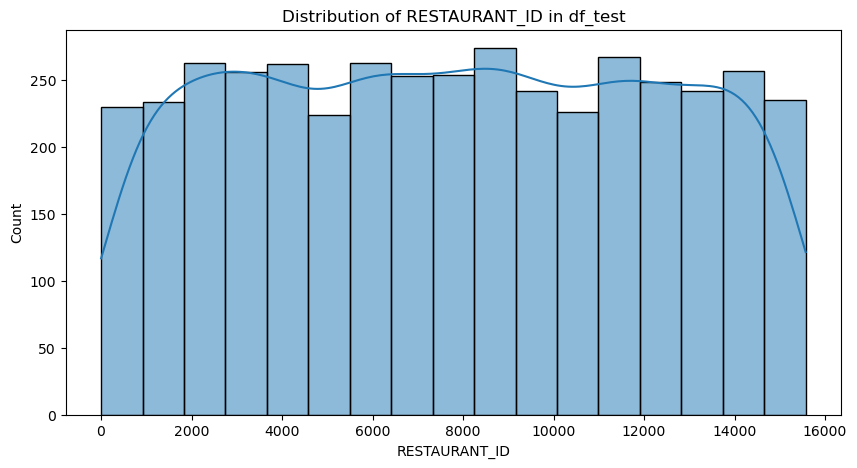

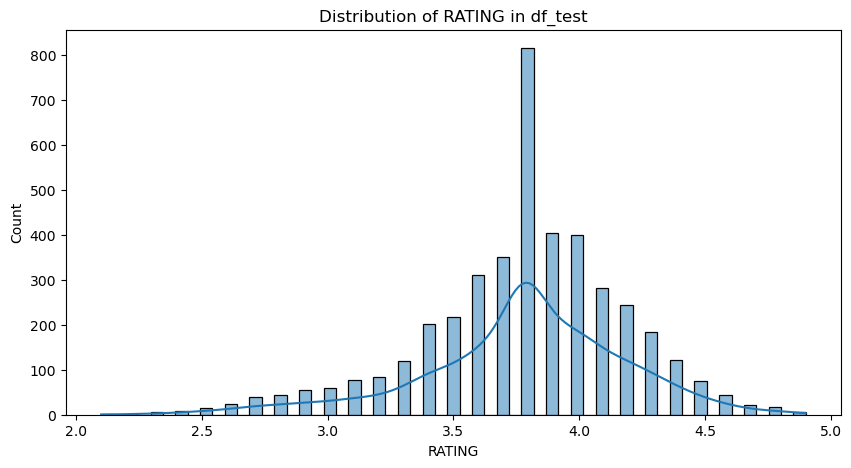

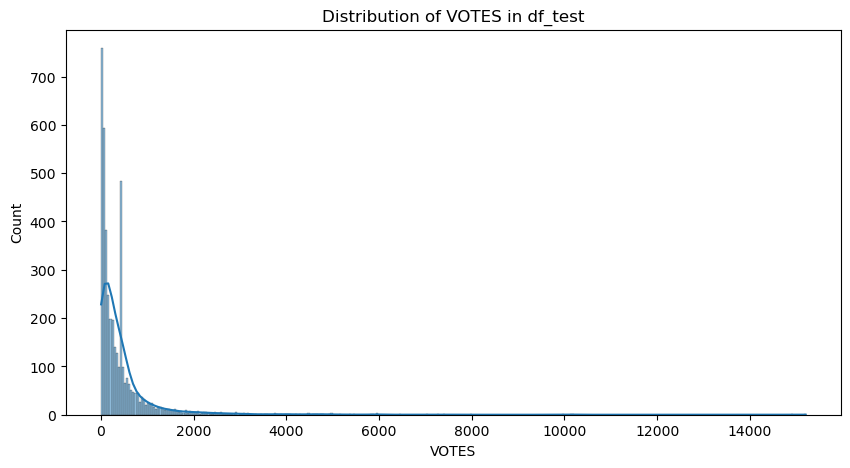

In [75]:
numerical_cols_df_test = df_test.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols_df_test:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_test[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} in df_test')
    plt.show()

##### We can see the slightly skewness in above graphs.

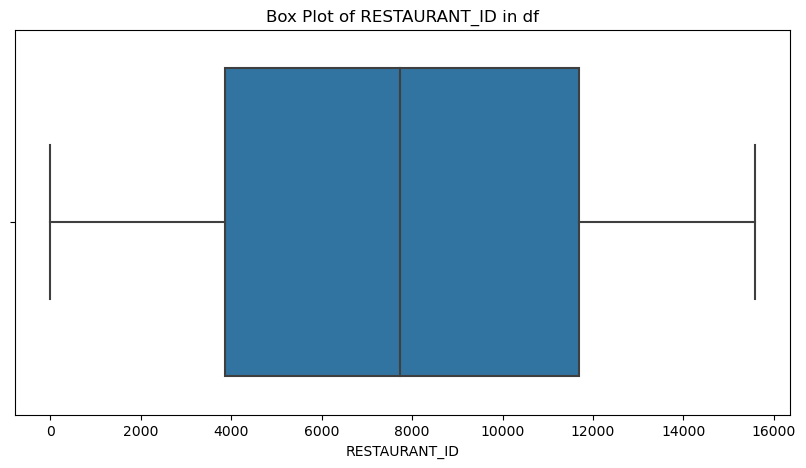

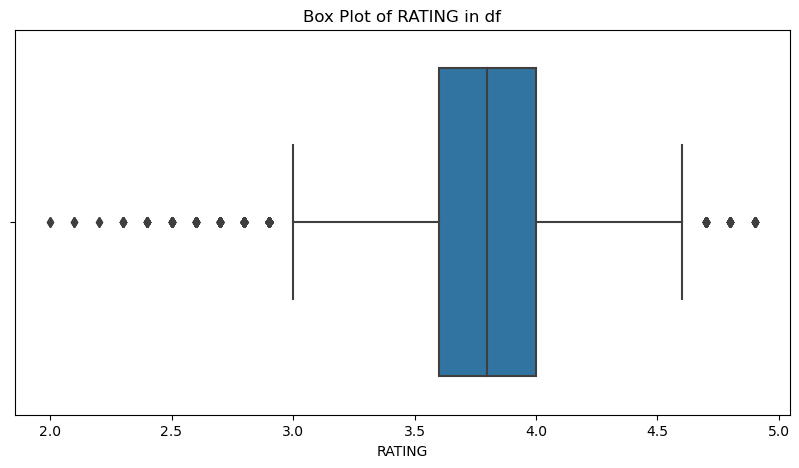

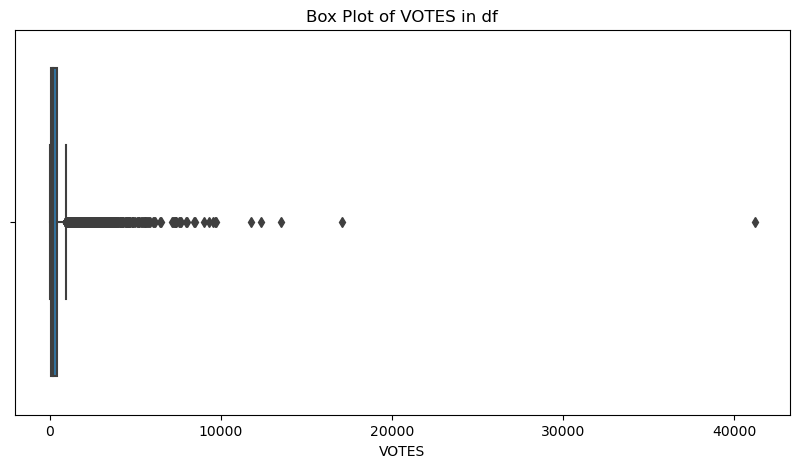

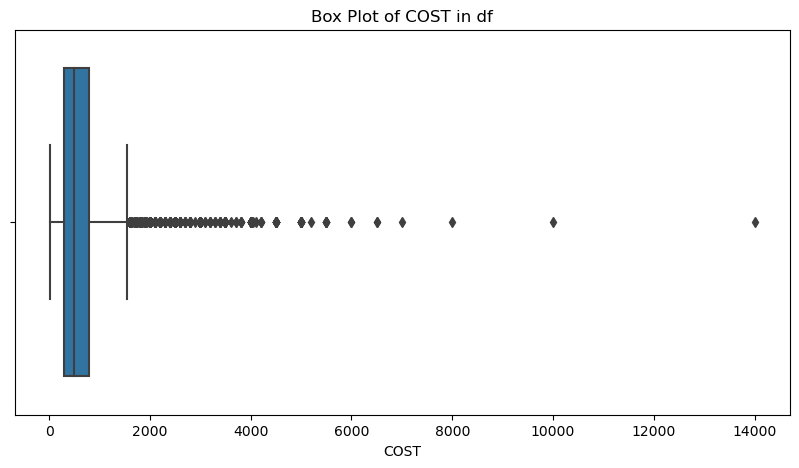

In [76]:
for col in numerical_cols_df:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} in df')
    plt.show()

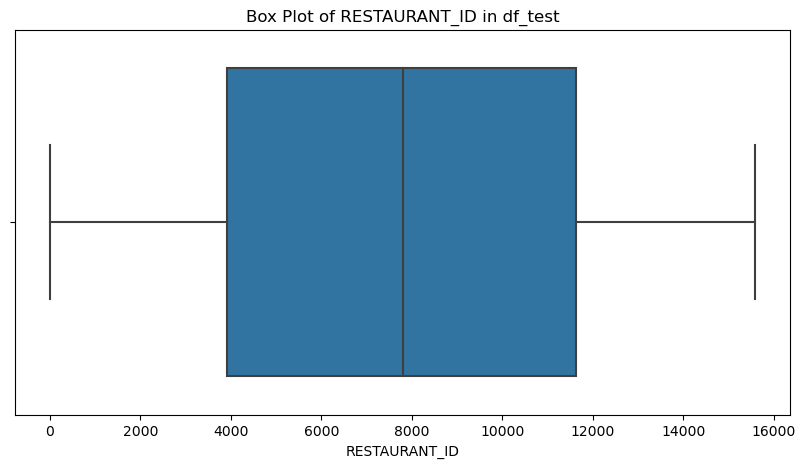

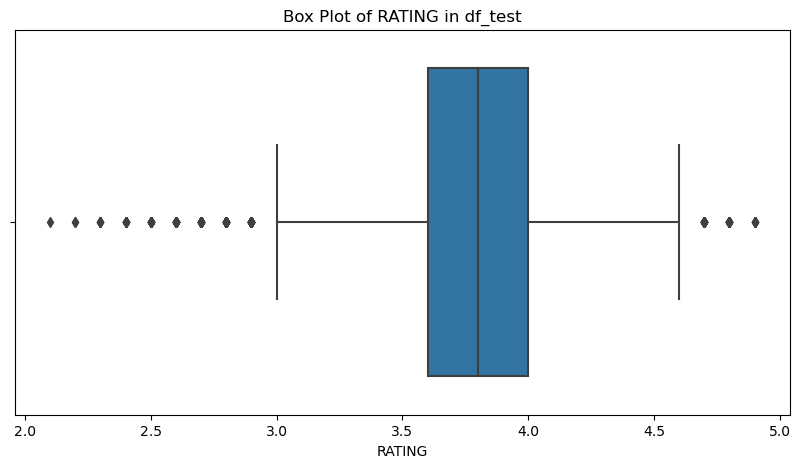

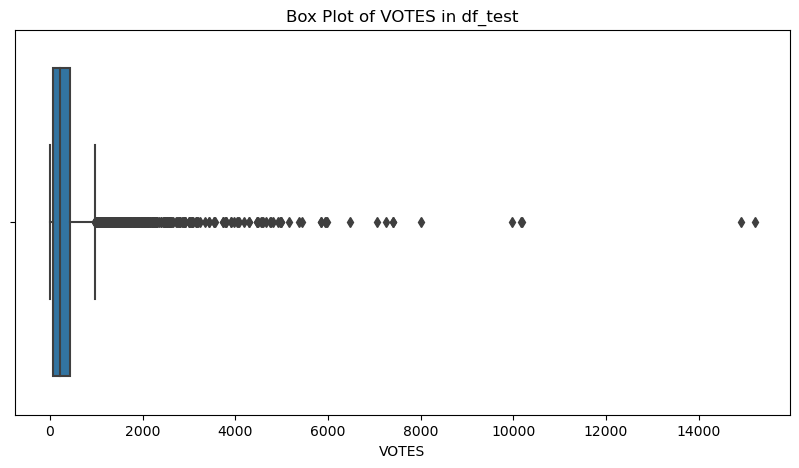

In [77]:
for col in numerical_cols_df_test:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_test[col])
    plt.title(f'Box Plot of {col} in df_test')
    plt.show()

##### There are some outliers present in our datasets.

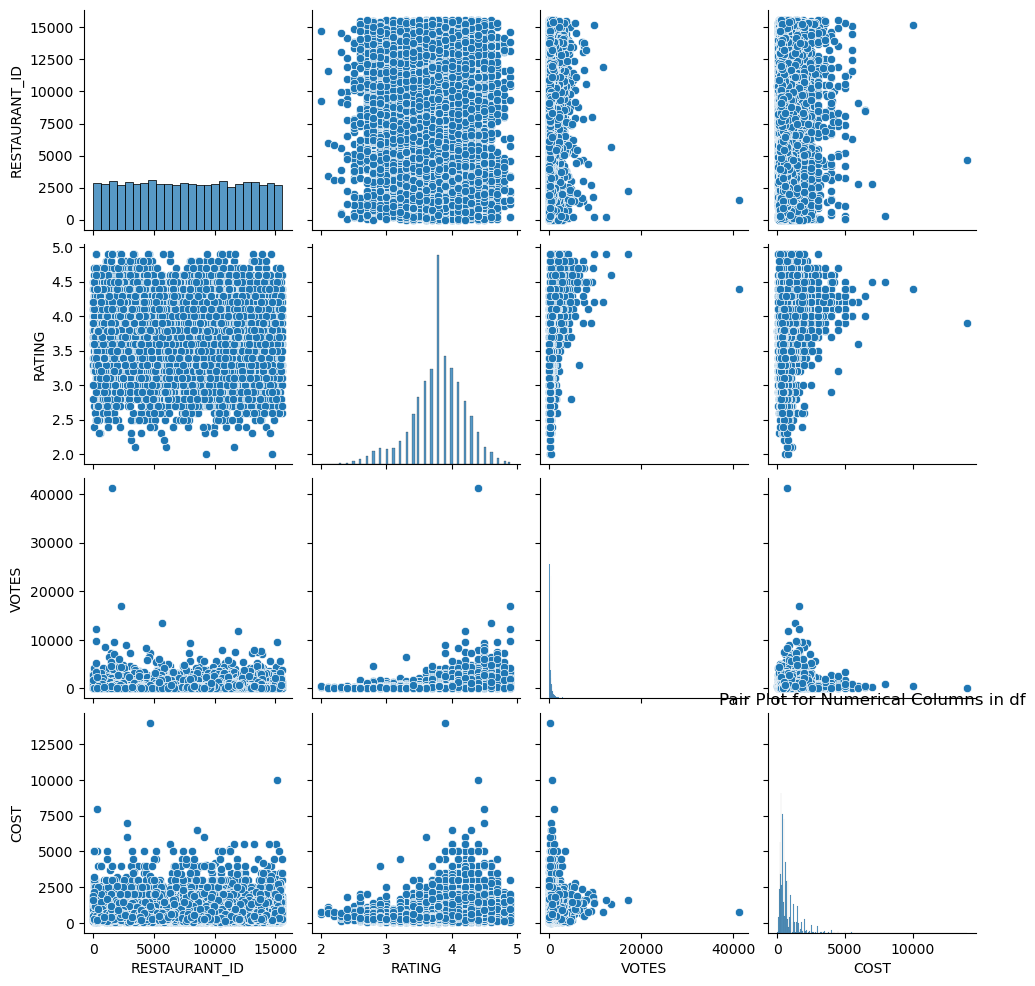

In [78]:
sns.pairplot(df[numerical_cols_df])
plt.title('Pair Plot for Numerical Columns in df')
plt.show()

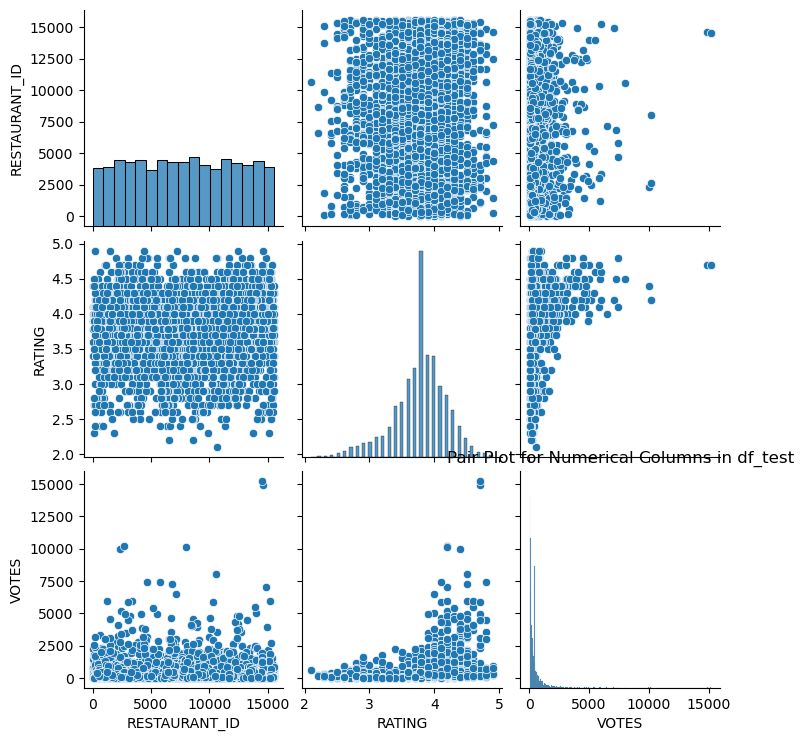

In [79]:
sns.pairplot(df_test[numerical_cols_df_test])
plt.title('Pair Plot for Numerical Columns in df_test')
plt.show()

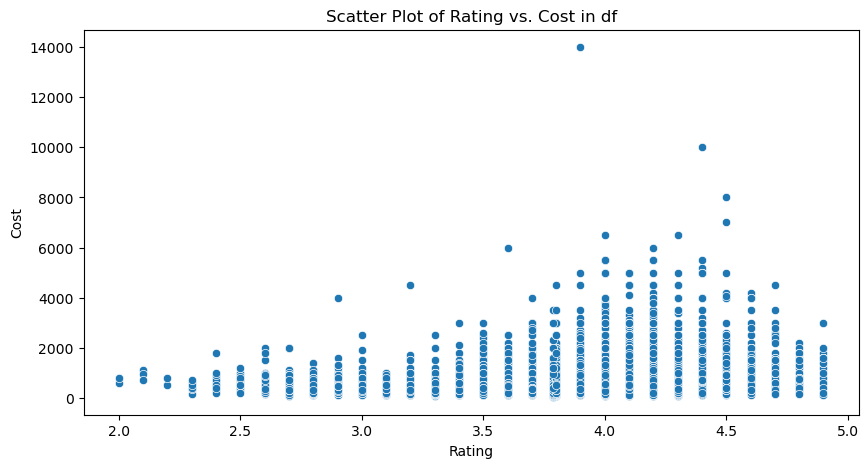

In [80]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='RATING', y='COST', data=df)
plt.title('Scatter Plot of Rating vs. Cost in df')
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.show()

##### This relationship shows that max cost of 14000 at rating 3.8  and min at rating 2.2

## Removing of outliers (Z-Score)

In [81]:
from scipy import stats
for col in numerical_cols_df:
    z_scores = stats.zscore(df[col].dropna())
    df['z_score'] = z_scores
    df = df[df['z_score'].abs() < 3]
    df = df.drop(columns=['z_score'])

In [82]:
for col in numerical_cols_df_test:
    z_scores = stats.zscore(df_test[col].dropna())
    df_test['z_score'] = z_scores
    df_test = df_test[df_test['z_score'].abs() < 3]
    df_test = df_test.drop(columns=['z_score'])

## Skewness

In [83]:
df.skew()

RESTAURANT_ID    0.013105
RATING          -0.431592
VOTES            2.527162
COST             1.820330
dtype: float64

In [84]:
df_test.skew()

RESTAURANT_ID    0.002654
RATING          -0.468629
VOTES            2.464018
dtype: float64

In [89]:
df['VOTES']=np.cbrt(df['VOTES'])
df['COST']=np.cbrt(df['COST'])

In [86]:
df_test['VOTES']=np.cbrt(df_test['VOTES'])

In [90]:
df_test.skew()

RESTAURANT_ID    0.002654
RATING          -0.468629
VOTES            0.526618
dtype: float64

In [91]:
df.skew()

RESTAURANT_ID    0.013105
RATING          -0.431592
VOTES           -0.017689
COST             0.747464
dtype: float64

##### Now the skewness is acceptable !!

### Separate features and target

In [103]:
X = df.drop(columns=['COST'])
y = df['COST']
X, df_test = X.align(df_test, join='left', axis=1, fill_value=0)

# Modeling

In [111]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [114]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)
y_pred_val_lr = pipeline_lr.predict(X_val)
mse_lr = mean_squared_error(y_val, y_pred_val_lr)
r2_lr = r2_score(y_val, y_pred_val_lr)
print("Linear Regression:")
print("  Mean Squared Error:", mse_lr)
print("  R^2 Score:", r2_lr)
df_test['Predicted_COST_LR'] = pipeline_lr.predict(df_test)
print("  Test Predictions (first 5):", df_test['Predicted_COST_LR'].head())

Linear Regression:
  Mean Squared Error: 1.0575744915935292
  R^2 Score: 0.6879653319678033
  Test Predictions (first 5): 0    11.839999
1     7.947421
2    10.606563
3    10.251532
4     6.326429
Name: Predicted_COST_LR, dtype: float64


In [117]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])
pipeline_knn.fit(X_train, y_train)
y_pred_val_knn = pipeline_knn.predict(X_val)
mse_knn = mean_squared_error(y_val, y_pred_val_knn)
r2_knn = r2_score(y_val, y_pred_val_knn)
print("\nK-Nearest Neighbors:")
print("  Mean Squared Error:", mse_knn)
print("  R^2 Score:", r2_knn)
df_test['Predicted_COST_KNN'] = pipeline_knn.predict(df_test)
print("  Test Predictions (first 5):", df_test['Predicted_COST_KNN'].head())


K-Nearest Neighbors:
  Mean Squared Error: 3.3189288536109323
  R^2 Score: 0.020758470168360077
  Test Predictions (first 5): 0    6.367181
1    7.601822
2    9.820731
3    7.258453
4    6.695460
Name: Predicted_COST_KNN, dtype: float64


In [120]:
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])
pipeline_dt.fit(X_train, y_train)
y_pred_val_dt = pipeline_dt.predict(X_val)
mse_dt = mean_squared_error(y_val, y_pred_val_dt)
r2_dt = r2_score(y_val, y_pred_val_dt)
print("\nDecision Tree:")
print("  Mean Squared Error:", mse_dt)
print("  R^2 Score:", r2_dt)
df_test['Predicted_COST_DT'] = pipeline_dt.predict(df_test)
print("  Test Predictions (first 5):", df_test['Predicted_COST_DT'].head())


Decision Tree:
  Mean Squared Error: 1.6606115910817154
  R^2 Score: 0.5100407671776985
  Test Predictions (first 5): 0    9.654894
1    7.368063
2    8.434327
3    7.937005
4    8.662391
Name: Predicted_COST_DT, dtype: float64


In [121]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,Predicted_COST_LR,Predicted_COST_KNN,Predicted_COST_DT
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.300000,8.262149,11.839999,6.367181,9.654894
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.200000,3.936497,7.947421,7.601822,7.368063
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.800000,7.047299,10.606563,9.820731,8.434327
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.800000,11.305487,10.251532,7.258453,7.937005
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.600000,2.843867,6.326429,6.695460,8.662391
...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.900000,6.596202,11.158598,8.232682,9.283178
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.300000,7.769462,10.135353,9.534373,9.283178
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.700000,3.756286,8.353200,6.774626,9.283178
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.781536,7.546493,9.342523,6.398734,9.283178


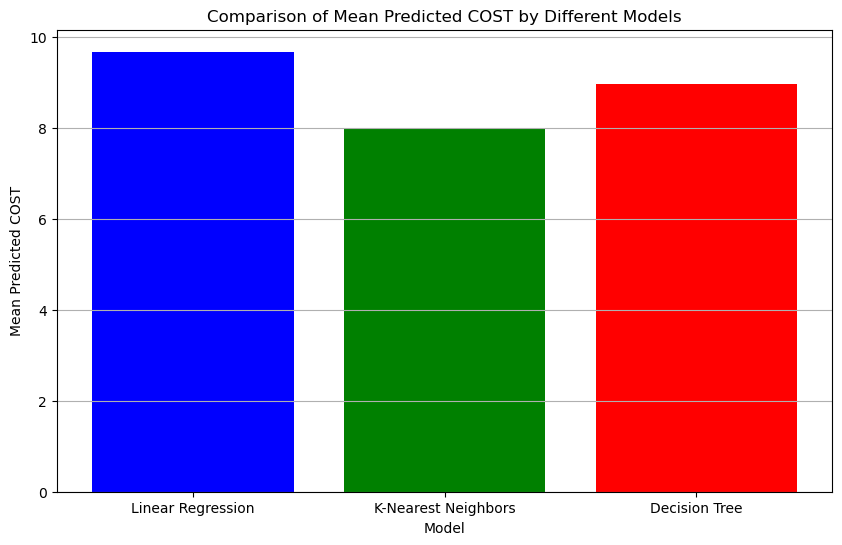

In [128]:
# Calculate the mean predicted cost for each model
mean_cost_lr = df_test['Predicted_COST_LR'].mean()
mean_cost_knn = df_test['Predicted_COST_KNN'].mean()
mean_cost_dt = df_test['Predicted_COST_DT'].mean()
models = ['Linear Regression', 'K-Nearest Neighbors', 'Decision Tree']
mean_costs = [mean_cost_lr, mean_cost_knn, mean_cost_dt]
plt.figure(figsize=(10, 6))
plt.bar(models, mean_costs, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Predicted COST')
plt.title('Comparison of Mean Predicted COST by Different Models')
plt.grid(axis='y')
plt.show()
